## HW 3. Решающее дерево

In [2]:
import numpy as np
import sklearn
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
data_pd = pd.read_csv('adult.data.csv')
data_pd = data_pd.sample(n = 500)
data_pd

,Age,workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Money
25418,39,Private,120074,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
20055,50,Private,183173,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
10209,32,Private,290964,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,1590,40,United-States,<=50K
15986,38,Private,22494,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,7443,0,40,United-States,<=50K
24455,26,Private,196899,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,Other,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,45,Private,108859,HS-grad,9,Separated,Craft-repair,Unmarried,Black,Female,0,0,40,United-States,<=50K
18912,24,?,412156,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
12246,50,Private,237819,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
10277,25,Private,123095,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,1590,40,United-States,<=50K


##### Предварительно обработаем таблицу: выкинем наны, вопросительные знаки и заменим неравенства, задающие классы на числа 0 и 1

In [18]:
data_pd = data_pd.dropna()
data_pd.info()

a = set()
for index, row in data_pd.iterrows():
    for item in row:
        if item == " ?":
            a.add(index)

data_pd.drop(list(a), axis=0, inplace=True)

data_pd['Money'] = (data_pd['Money'] == " <=50K").astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 25418 to 2302
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             500 non-null    int64 
 1   workclass       500 non-null    object
 2   Fnlwgt          500 non-null    int64 
 3   Education       500 non-null    object
 4   Education-num   500 non-null    int64 
 5   Marital-status  500 non-null    object
 6   Occupation      500 non-null    object
 7   Relationship    500 non-null    object
 8   Race            500 non-null    object
 9   Sex             500 non-null    object
 10  Capital-gain    500 non-null    int64 
 11  Capital-loss    500 non-null    int64 
 12  Hours-per-week  500 non-null    int64 
 13  Native-country  500 non-null    object
 14  Money           500 non-null    object
dtypes: int64(6), object(9)
memory usage: 62.5+ KB


In [19]:
X = data_pd.drop(['Money'], axis=1)
y = data_pd['Money']

##### Разобьем данные:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Обучим кастомное дерево решений: 

In [21]:
from decision_tree import DecisionTree

my_ds = DecisionTree(max_depth=5, min_node_size=20)
root_train_pd = my_ds.fit(X_train, y_train)

##### И посмотрим на ошибку

In [22]:
predictions = my_ds.predict(X_test)

accuracy = np.sum(predictions == y_test.to_numpy()) / len(predictions)

print("accuracy = ", accuracy)

accuracy =  0.7581699346405228


##### По желанию отрисуем дерево:

In [23]:
my_ds.draw(my_ds.root, X.columns, 0)

 Relationship  =   Husband ||  Wife
— Occupation  =   Prof-specialty ||  Exec-managerial ||  Protective-serv ||  Tech-support ||  Craft-repair ||  Sales
—— Education  =   Doctorate ||  Masters ||  Assoc-acdm ||  Prof-school ||  10th
——— 0
——— workclass  =   State-gov ||  Self-emp-inc ||  Private
———— Age < 65
————— 0
————— 1
———— 1
—— Age < 36
——— 1
——— Education  =   Some-college ||  HS-grad ||  Bachelors
———— workclass  =   Private
————— 0
————— 1
———— 1
— Occupation  =   Protective-serv
—— 0
—— Native-country  =   Philippines
——— 0
——— Capital-gain < 99999
———— Education  =   Bachelors
————— 1
————— 1
———— 0


##### Далее - обучим библиотечное дерево и посмотрим на ошибку

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)
y_test = y_test.to_numpy()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 1424 to 25485
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             309 non-null    int64
 1   workclass       309 non-null    int64
 2   Fnlwgt          309 non-null    int64
 3   Education       309 non-null    int64
 4   Education-num   309 non-null    int64
 5   Marital-status  309 non-null    int64
 6   Occupation      309 non-null    int64
 7   Relationship    309 non-null    int64
 8   Race            309 non-null    int64
 9   Sex             309 non-null    int64
 10  Capital-gain    309 non-null    int64
 11  Capital-loss    309 non-null    int64
 12  Hours-per-week  309 non-null    int64
 13  Native-country  309 non-null    int64
dtypes: int64(14)
memory usage: 36.2 KB


In [26]:
tree = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
tree.fit(X_train,
         y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
predict = tree.predict(X_test)

In [28]:
accuracy = sum(predict == y_test) / len(predict)

print(accuracy)

0.803921568627451


##### Следующий и последний этап - построениие случайного леса и оценка OOB

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [30]:
predict_rf = rf.predict(X_test)

In [31]:
accuracy = sum(predict_rf == y_test) / len(predict)

print(accuracy)

0.8300653594771242


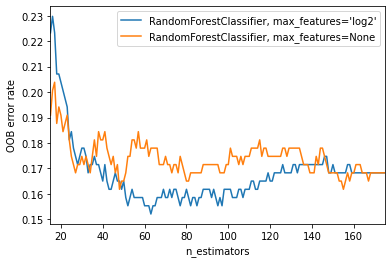

In [32]:
from collections import OrderedDict
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, random_state=42)) ]


error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()